# Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/perceptron_algorithm

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 186 (delta 85), reused 150 (delta 49), pack-reused 0
Receiving objects: 100% (186/186), 34.12 MiB | 20.19 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/machine_learning_1/perceptron_algorithm


In [2]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [3]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

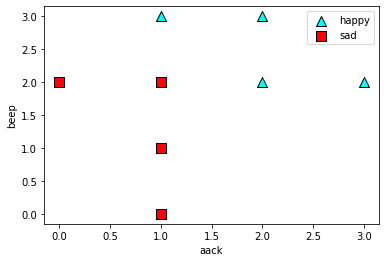

In [4]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [5]:
def step(x):
    ## TODO ##
    # implement step function
    if x >= 0:
        output= 1
    else:
        output= 0
    return output

def score(weights, bias, features):
    ## TODO ##
    # implement score calculation
    output= features.dot(weights) + bias

    return output

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using step and score functions
    output= step(score(weights, bias, features))

    return output

def error(weights, bias, features, label):
    ## TODO ##
    # implement error calculation using prediction and score functions
    pred = prediction(weights, bias, features)
    if pred == label:
        output= 0
    else:
        output= np.abs(score(weights, bias, features))
    return output

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [6]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample
    pred = prediction(weights,bias,features)
    for i in range(len(weights)):
      weights[i] += learning_rate * (label - pred) * features[i]
      bias += learning_rate *(label-pred)

    return weights, bias

### Running the perceptron algorithm

In [7]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    ## TODO ##
    # for this number of epochs 
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use perceptron_trick update weights and bias
    for ep in range (epochs):
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

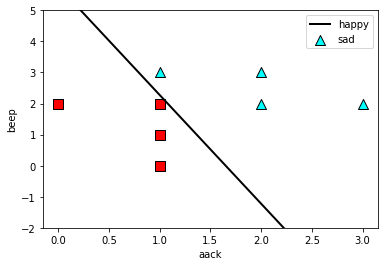

([0.6299999999999997, 0.17999999999999938], -1.0400000000000007)

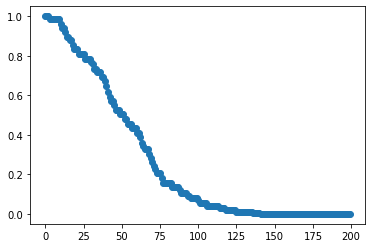

In [8]:
perceptron_algorithm(features, labels)

### The perceptron algorithm using SKlearn

In [10]:
from sklearn import linear_model
from sklearn.linear_model import Perceptron
## TODO ##
# Use SKlearn to train perceptron algorithm
clf=linear_model.Perceptron()
clf.fit(features , labels)

Perceptron()

In [11]:
clf.score(features, labels)

1.0

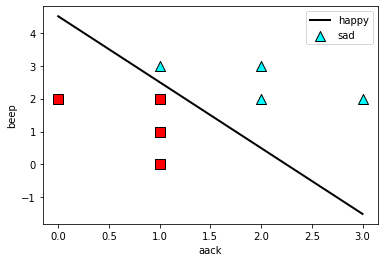

In [12]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()